In [ ]:
"""
Boston housing dataset: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
Data has white spaces, not commas.
1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's
"""

In [25]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [4]:
# load data and arrange into Pandas dataframe
df = read_csv("/Users/jjimenez/Documents/GitHub/data-science/deep-learning/rental-airbnb/boston.csv", delim_whitespace=True, header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [7]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


df.columns = feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [39]:
df = df.rename(columns={'MEDV': 'PRICE'})
df.describe().round(0)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,4.0,11.0,11.0,0.0,1.0,6.0,69.0,4.0,10.0,408.0,18.0,357.0,13.0,23.0
std,9.0,23.0,7.0,0.0,0.0,1.0,28.0,2.0,9.0,169.0,2.0,91.0,7.0,9.0
min,0.0,0.0,0.0,0.0,0.0,4.0,3.0,1.0,1.0,187.0,13.0,0.0,2.0,5.0
25%,0.0,0.0,5.0,0.0,0.0,6.0,45.0,2.0,4.0,279.0,17.0,375.0,7.0,17.0
50%,0.0,0.0,10.0,0.0,1.0,6.0,78.0,3.0,5.0,330.0,19.0,391.0,11.0,21.0
75%,4.0,12.0,18.0,0.0,1.0,7.0,94.0,5.0,24.0,666.0,20.0,396.0,17.0,25.0
max,89.0,100.0,28.0,1.0,1.0,9.0,100.0,12.0,24.0,711.0,22.0,397.0,38.0,50.0


<AxesSubplot:>

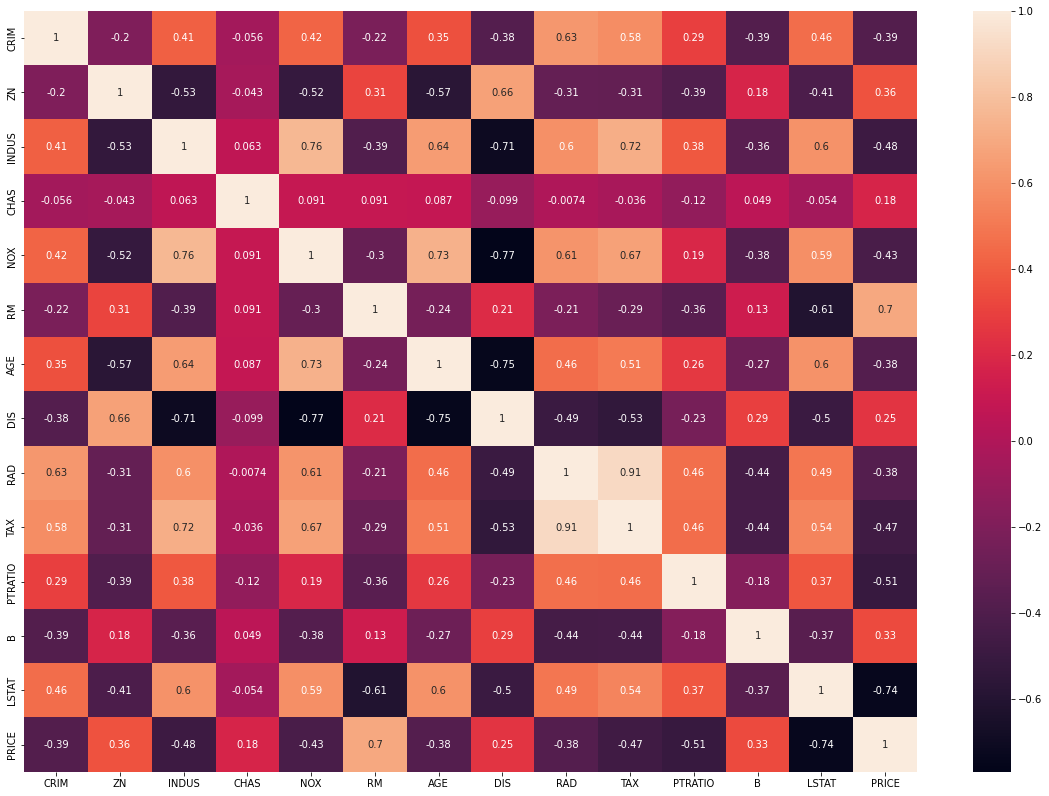

In [26]:
# Check Correlation Among the Features
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(), annot=True)

In [27]:
df.isnull().sum().sort_values(ascending=False)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [9]:
#Split into features and target (Price)
X = df.drop('PRICE', axis = 1)
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [10]:
#Scale data, otherwise model will fail.
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
scaled_var = pd.concat([pd.DataFrame(X_train_scaled), pd.DataFrame(X_test_scaled)], axis=0).describe().round(0)

In [38]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

scaled_var.columns = features
scaled_var


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-0.0,-1.0,-2.0,-0.0,-1.0,-4.0,-2.0,-1.0,-1.0,-1.0,-3.0,-4.0,-1.0
25%,-0.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,0.0,-1.0
50%,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-1.0,-0.0,0.0,0.0,-0.0
75%,0.0,0.0,1.0,-0.0,1.0,0.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0
max,10.0,4.0,2.0,4.0,3.0,3.0,1.0,4.0,2.0,2.0,2.0,0.0,3.0


In [11]:
# Model 2
model = Sequential()
model.add(Dense(128, input_dim=13, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100)

Epoch 1/100
11/11 [==============================] - 2s 89ms/step - loss: 553.6155 - mae: 21.7944 - val_loss: 595.5030 - val_mae: 22.3464
Epoch 2/100
11/11 [==============================] - 0s 10ms/step - loss: 537.1625 - mae: 21.3527 - val_loss: 532.7274 - val_mae: 21.0167
Epoch 3/100
11/11 [==============================] - 0s 11ms/step - loss: 486.0231 - mae: 19.8709 - val_loss: 453.4333 - val_mae: 19.2099
Epoch 4/100
11/11 [==============================] - 0s 12ms/step - loss: 421.6510 - mae: 18.5005 - val_loss: 350.7903 - val_mae: 16.5846
Epoch 5/100
11/11 [==============================] - 0s 12ms/step - loss: 299.9146 - mae: 15.0815 - val_loss: 236.6588 - val_mae: 13.1378
Epoch 6/100
11/11 [==============================] - 0s 12ms/step - loss: 195.3527 - mae: 11.7224 - val_loss: 143.1917 - val_mae: 9.7216
Epoch 7/100
11/11 [==============================] - 0s 12ms/step - loss: 137.8344 - mae: 9.1564 - val_loss: 89.2251 - val_mae: 7.3960
Epoch 8/100
11/11 [===================

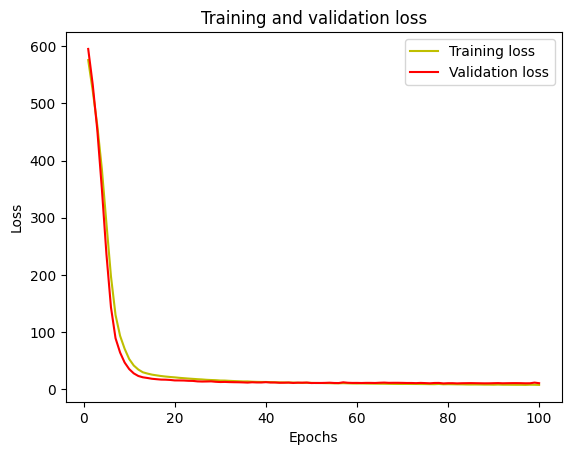

In [13]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

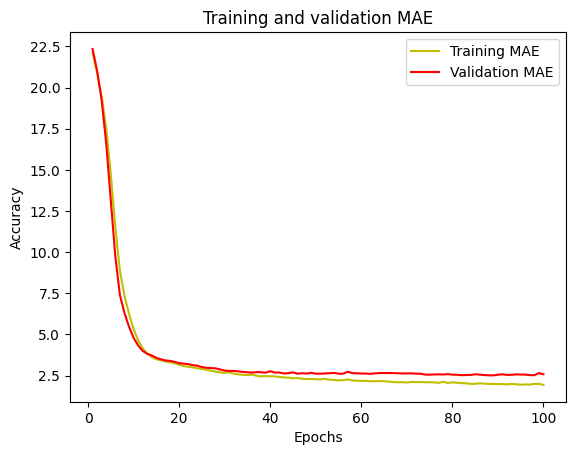

In [16]:
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
#Predict on test data
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

Predicted values are:  [[18.511473]
 [20.626062]
 [20.948223]
 [21.007578]
 [12.636007]]
Real values are:  498    21.2
94     20.6
150    21.5
221    21.7
423    13.4
Name: PRICE, dtype: float64


In [18]:
#Comparison with other models..
#Neural network - from model 1
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

4/4 [==============================] - 0s 5ms/step - loss: 15.4171 - mae: 2.9384
Mean squared error from neural net:  15.417099952697754
Mean absolute error from neural net:  2.9383647441864014


In [53]:
# Model 1
import tensorflow as tf
from tensorflow import keras 

model = keras.models.Sequential([
    keras.layers.Dense(130, input_shape = (13,), activation="relu"),
    keras.layers.Dense(60, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(optimizer="adam", loss="mae", metrics=["mse"])
history = model.fit(X_train_scaled, y_train, batch_size=50, epochs=20)

Epoch 1/20
9/9 [==============================] - 1s 2ms/step - loss: 2.2401 - mse: 14.5723
Epoch 2/20
9/9 [==============================] - 0s 2ms/step - loss: 2.2304 - mse: 13.6534
Epoch 3/20
9/9 [==============================] - 0s 3ms/step - loss: 1.9920 - mse: 10.4273
Epoch 4/20
9/9 [==============================] - 0s 12ms/step - loss: 2.1727 - mse: 14.2120
Epoch 5/20
9/9 [==============================] - 0s 3ms/step - loss: 2.1201 - mse: 11.7214
Epoch 6/20
9/9 [==============================] - 0s 4ms/step - loss: 2.1625 - mse: 14.0693
Epoch 7/20
9/9 [==============================] - 0s 3ms/step - loss: 2.0921 - mse: 11.7512
Epoch 8/20
9/9 [==============================] - 0s 2ms/step - loss: 2.2948 - mse: 15.3284
Epoch 9/20
9/9 [==============================] - 0s 5ms/step - loss: 2.0015 - mse: 12.7380
Epoch 10/20
9/9 [==============================] - 0s 2ms/step - loss: 2.1111 - mse: 12.6391
Epoch 11/20
9/9 [==============================] - 0s 2ms/step - loss: 2.1726 

In [61]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 130)               1820      
_________________________________________________________________
dense_13 (Dense)             (None, 60)                7860      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 61        
Total params: 9,741
Trainable params: 9,741
Non-trainable params: 0
_________________________________________________________________


In [59]:
#Neural network - from model 2
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

4/4 [==============================] - 0s 2ms/step - loss: 2.4854 - mse: 12.0259
Mean squared error from neural net:  2.4853947162628174
Mean absolute error from neural net:  12.025870323181152


In [19]:
#Linear regression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Linear regression
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

Mean squared error from linear regression:  16.49535197593168
Mean absolute error from linear regression:  3.0558941538909594


In [ ]:
lr_model = linear_model.LinearRegression()

In [20]:
### Decision tree
tree = DecisionTreeRegressor(criterion="squared_error")
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)

Mean squared error using decision tree:  19.13578431372549
Mean absolute error using decision tree:  3.183333333333333


In [ ]:
tree = DecisionTreeRegressor(criterion="squared_error")

In [21]:
#Random forest.
#Increase number of tress and see the effect
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 30, random_state=30)
model.fit(X_train_scaled, y_train)

y_pred_RF = model.predict(X_test_scaled)

mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)

Mean squared error using Random Forest:  12.701104793028327
Mean absolute error Using Random Forest:  2.408235294117647


In [ ]:
model = RandomForestRegressor(n_estimators = 30, random_state=30)

In [22]:
#Feature ranking...
import pandas as pd
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

LSTAT      0.478879
RM         0.338097
DIS        0.063072
CRIM       0.038339
NOX        0.019377
PTRATIO    0.014499
B          0.013671
TAX        0.013144
AGE        0.010595
INDUS      0.004749
RAD        0.003753
ZN         0.001460
CHAS       0.000364
dtype: float64
